<a href="https://colab.research.google.com/github/simingg/BT4014/blob/main/03_Performance_Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data

In [ ]:
df = pd.read_csv('../Data/events_cleaned_1.csv')
os.chdir('../Results/Reward Distribution 1')

# df = pd.read_csv('../Data/events_cleaned_2.csv')
# os.chdir('../Results/Reward Distribution 2')

# df = pd.read_csv('../Data/events_cleaned_3.csv')
# os.chdir('../Results/Reward Distribution 3')

eg_results = pd.read_csv('Epsilon-Greedy/eg_results.csv')
ed_results = pd.read_csv('Epsilon-Decay/ed_results.csv')
sm_results = pd.read_csv('Softmax/sm_results.csv')
asm_results = pd.read_csv('Annealing Softmax/asm_results.csv')
ucb1_results = pd.read_csv('UCB1/ucb1_results.csv')
bucb_results = pd.read_csv('Bayesian UCB/bucb_results.csv')
thomp_results = pd.read_csv('Thompson Sampling/thomp_results.csv')

# 2. Check Best Arms

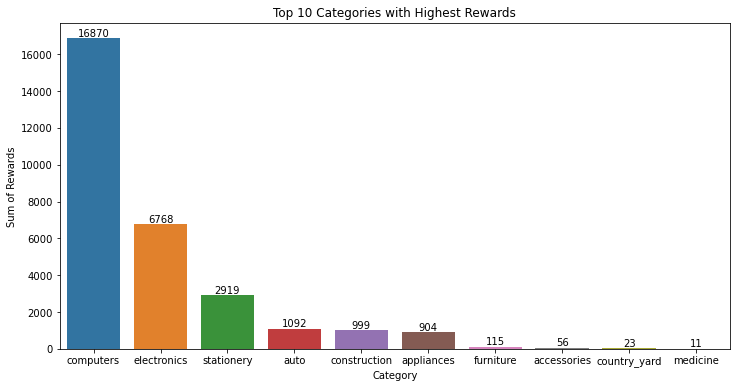

In [ ]:
# get top 10 categories with highest rewards
d = df.sum().sort_values(ascending=False)[:10]

# plot graph
plt.figure(figsize=(12,6))
ax = sns.barplot(x=d.index, y=d.values)
ax.set_title('Top 10 Categories with Highest Rewards')
ax.set_xlabel('Category')
ax.set_ylabel('Sum of Rewards')

# label
labels = d.values
rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+2, round(label,2), ha='center', va='bottom')

plt.savefig('best_arm.png', dpi=300)
plt.show()

# 3. Analyse Performances

## 3.1. Epsilon-Greedy Algorithm

In [ ]:
eg_results['if_best_arm'] = np.where(eg_results['chosen_arm']==df.columns.get_loc(df.sum().idxmax()), 1, 0)
eg_results_plot = eg_results.groupby(['type', 'n_step'], as_index=False).aggregate({'if_best_arm': lambda x: x.sum()/float(x.count()), 'rewards':'mean', 'cumulative_rewards':'mean'})
plt.style.use('ggplot')

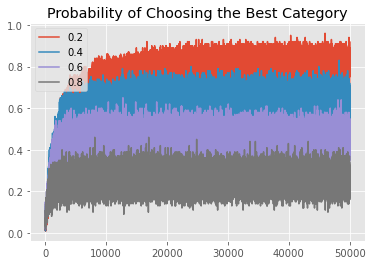

In [ ]:
# plot probability of choosing the best arm
fig = plt.figure()
ax = fig.add_subplot(111)
for epsilon in eg_results_plot['type'].unique():
    results_epsilon = eg_results_plot[eg_results_plot['type']==epsilon]
    ax.plot(results_epsilon['n_step'], results_epsilon['if_best_arm'], label=str(epsilon))
plt.legend()
plt.title('Probability of Choosing the Best Category')
plt.savefig('Epsilon-Greedy/eg_best_arm.png', dpi=300)
plt.show()

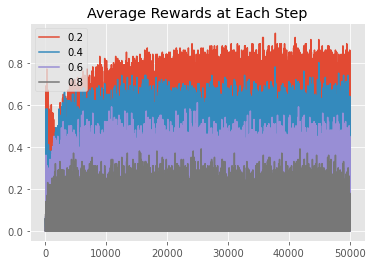

In [ ]:
# plot average rewards at each step
fig = plt.figure()
ax = fig.add_subplot(111)
for epsilon in eg_results_plot['type'].unique():
    results_epsilon = eg_results_plot[eg_results_plot['type']==epsilon]
    ax.plot(results_epsilon['n_step'], results_epsilon['rewards'], label=str(epsilon))
plt.legend()
plt.title("Average Rewards at Each Step")
plt.savefig('Epsilon-Greedy/eg_avg_rewards.png', dpi=300)
plt.show()

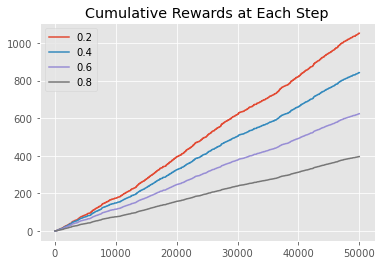

In [ ]:
# plot cumulative rewards at each step
fig = plt.figure()
ax = fig.add_subplot(111)
for epsilon in eg_results_plot['type'].unique():
    results_epsilon = eg_results_plot[eg_results_plot['type']==epsilon]
    ax.plot(results_epsilon['n_step'], results_epsilon['cumulative_rewards'], label=str(epsilon))
plt.legend()
plt.title('Cumulative Rewards at Each Step')
plt.savefig('Epsilon-Greedy/eg_cum_rewards.png', dpi=300)
plt.show()

## 3.2. Epsilon-Decay Algorithm

In [ ]:
ed_results['if_best_arm'] = np.where(ed_results['chosen_arm']==df.columns.get_loc(df.sum().idxmax()), 1, 0)
ed_results_plot = ed_results.groupby(['type', 'n_step'], as_index=False).aggregate({'if_best_arm':lambda x: x.sum()/(x.count()+0.0), 'rewards':'mean', 'cumulative_rewards':'mean'})
plt.style.use('ggplot')

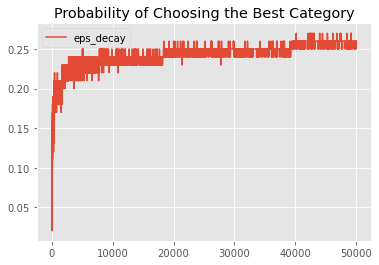

In [ ]:
# plot probability of choosing the best arm
fig = plt.figure()
ax = fig.add_subplot(111)
for epsilon in ed_results_plot['type'].unique():
    results_epsilon = ed_results_plot[ed_results_plot['type']==epsilon]
    ax.plot(results_epsilon['n_step'], results_epsilon['if_best_arm'], label=str(epsilon))
plt.legend()
plt.title('Probability of Choosing the Best Category')
plt.savefig('Epsilon-Decay/ed_best_arm.png', dpi=300)
plt.show()

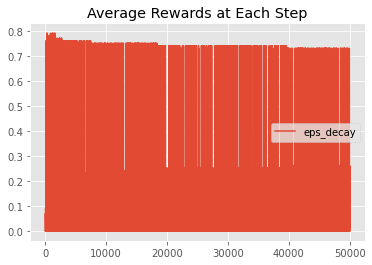

In [ ]:
# plot average rewards at each step
fig = plt.figure()
ax = fig.add_subplot(111)
for epsilon in ed_results_plot['type'].unique():
    results_epsilon = ed_results_plot[ed_results_plot['type']==epsilon]
    ax.plot(results_epsilon['n_step'], results_epsilon['rewards'], label=str(epsilon))
plt.legend()
plt.title("Average Rewards at Each Step")
plt.savefig('Epsilon-Decay/ed_avg_rewards.png', dpi=300)
plt.show()

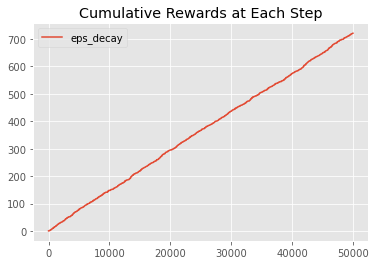

In [ ]:
# plot cumulative rewards at each step
fig = plt.figure()
ax = fig.add_subplot(111)
for epsilon in ed_results_plot['type'].unique():
    results_epsilon = ed_results_plot[ed_results_plot['type']==epsilon]
    ax.plot(results_epsilon['n_step'], results_epsilon['cumulative_rewards'], label=str(epsilon))
plt.legend()
plt.title('Cumulative Rewards at Each Step')
plt.savefig('Epsilon-Decay/ed_cum_rewards.png', dpi=300)
plt.show()

## 3.3. Softmax Algorithm

In [ ]:
sm_results['if_best_arm'] = np.where(sm_results['chosen_arm']==df.columns.get_loc(df.sum().idxmax()), 1, 0)
sm_results_plot = sm_results.groupby(['type', 'n_step'], as_index=False).aggregate({'if_best_arm': lambda x: x.sum()/float(x.count()), 'rewards':'mean', 'cumulative_rewards':'mean'})
plt.style.use('ggplot')

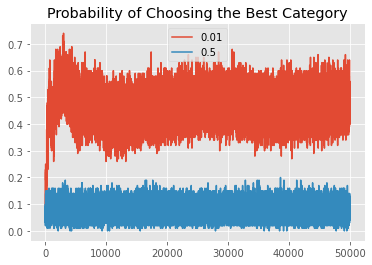

In [ ]:
# plot probability of choosing the best arm
fig = plt.figure()
ax = fig.add_subplot(111)
for temperature in sm_results_plot['type'].unique():
    results_temperature = sm_results_plot[sm_results_plot['type']==temperature]
    ax.plot(results_temperature['n_step'], results_temperature['if_best_arm'], label=str(temperature))
plt.legend()
plt.title('Probability of Choosing the Best Category')
plt.savefig('Softmax/sm_best_arm.png', dpi=300)
plt.show()

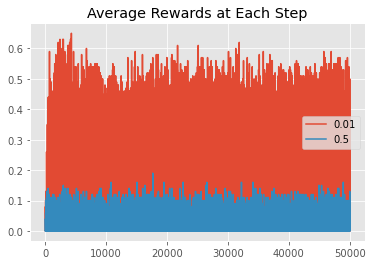

In [ ]:
# plot average rewards at each step
fig = plt.figure()
ax = fig.add_subplot(111)
for temperature in sm_results_plot['type'].unique():
    results_temperature = sm_results_plot[sm_results_plot['type']==temperature]
    ax.plot(results_temperature['n_step'], results_temperature['rewards'], label=str(temperature))
plt.legend()
plt.title("Average Rewards at Each Step")
plt.savefig('Softmax/sm_avg_rewards.png', dpi=300)
plt.show()

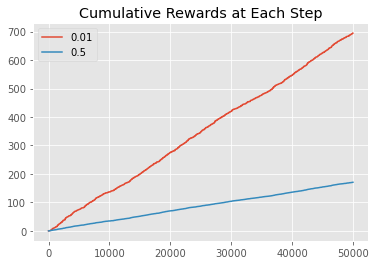

In [ ]:
# plot cumulative rewards at each step
fig = plt.figure()
ax = fig.add_subplot(111)
for temperature in sm_results_plot['type'].unique():
    results_temperature = sm_results_plot[sm_results_plot['type']==temperature]
    ax.plot(results_temperature['n_step'], results_temperature['cumulative_rewards'], label=str(temperature))
plt.legend()
plt.title('Cumulative Rewards at Each Step')
plt.savefig('Softmax/sm_cum_rewards.png', dpi=300)
plt.show()

## 3.4. Annealing Softmax Algorithm

In [ ]:
asm_results['if_best_arm'] = np.where(asm_results['chosen_arm']==df.columns.get_loc(df.sum().idxmax()), 1, 0)
asm_results_plot = asm_results.groupby(['type', 'n_step'], as_index=False).aggregate({'if_best_arm': lambda x: x.sum()/float(x.count()), 'rewards':'mean', 'cumulative_rewards':'mean'})
plt.style.use('ggplot')

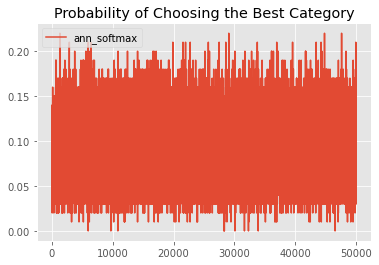

In [ ]:
# plot probability of choosing the best arm
fig = plt.figure()
ax = fig.add_subplot(111)
for temperature in asm_results_plot['type'].unique():
    results_temperature = asm_results_plot[asm_results_plot['type']==temperature]
    ax.plot(results_temperature['n_step'], results_temperature['if_best_arm'], label=str(temperature))
plt.legend()
plt.title('Probability of Choosing the Best Category')
plt.savefig('Annealing Softmax/asm_best_arm.png', dpi=300)
plt.show()

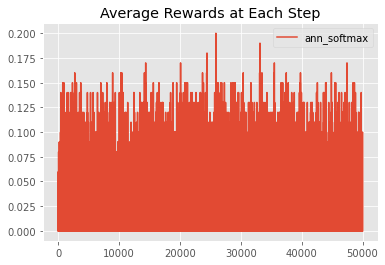

In [ ]:
# plot average rewards at each step
fig = plt.figure()
ax = fig.add_subplot(111)
for temperature in asm_results_plot['type'].unique():
    results_temperature = asm_results_plot[asm_results_plot['type']==temperature]
    ax.plot(results_temperature['n_step'], results_temperature['rewards'], label=str(temperature))
plt.legend()
plt.title("Average Rewards at Each Step")
plt.savefig('Annealing Softmax/asm_avg_rewards.png', dpi=300)
plt.show()

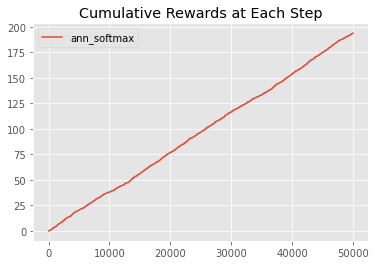

In [ ]:
# plot cumulative rewards at each step
fig = plt.figure()
ax = fig.add_subplot(111)
for temperature in asm_results_plot['type'].unique():
    results_temperature = asm_results_plot[asm_results_plot['type']==temperature]
    ax.plot(results_temperature['n_step'], results_temperature['cumulative_rewards'], label=str(temperature))
plt.legend()
plt.title('Cumulative Rewards at Each Step')
plt.savefig('Annealing Softmax/asm_cum_rewards.png', dpi=300)
plt.show()

## 3.5. UCB1 Algorithm

In [ ]:
ucb1_results['if_best_arm'] = np.where(ucb1_results['chosen_arm']==df.columns.get_loc(df.sum().idxmax()), 1, 0)
ucb1_results_plot = ucb1_results.groupby(['type', 'n_step'], as_index=False).aggregate({'if_best_arm': lambda x: x.sum()/float(x.count()), 'rewards':'mean', 'cumulative_rewards':'mean'})
plt.style.use('ggplot')

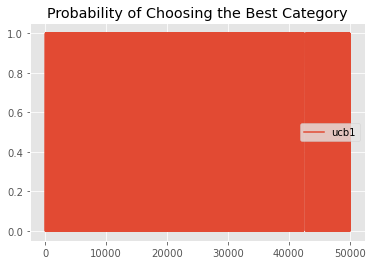

In [ ]:
# plot probability of choosing the best arm
fig = plt.figure()
ax = fig.add_subplot(111)
for ucb in ucb1_results_plot['type'].unique():
    results_ucb = ucb1_results_plot[ucb1_results_plot['type']==ucb]
    ax.plot(results_ucb['n_step'], results_ucb['if_best_arm'], label=str(ucb))
plt.legend()
plt.title('Probability of Choosing the Best Category')
plt.savefig('UCB1/ucb1_best_arm.png', dpi=300)
plt.show()

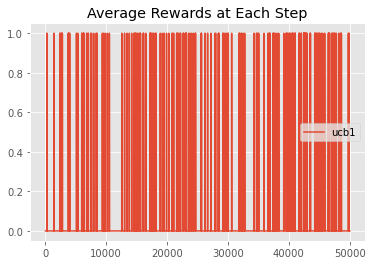

In [ ]:
# plot average rewards at each step
fig = plt.figure()
ax = fig.add_subplot(111)
for ucb in ucb1_results_plot['type'].unique():
    results_ucb = ucb1_results_plot[ucb1_results_plot['type']==ucb]
    ax.plot(results_ucb['n_step'], results_ucb['rewards'], label=str(ucb))
plt.legend()
plt.title("Average Rewards at Each Step")
plt.savefig('UCB1/ucb1_avg_rewards.png', dpi=300)
plt.show()

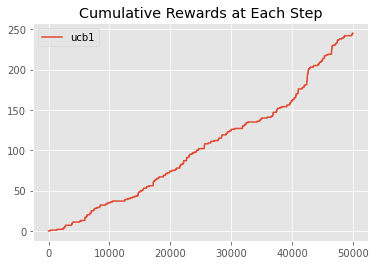

In [ ]:
# plot cumulative rewards at each step
fig = plt.figure()
ax = fig.add_subplot(111)
for ucb in ucb1_results_plot['type'].unique():
    results_ucb = ucb1_results_plot[ucb1_results_plot['type']==ucb]
    ax.plot(results_ucb['n_step'], results_ucb['cumulative_rewards'], label=str(ucb))
plt.legend()
plt.title('Cumulative Rewards at Each Step')
plt.savefig('UCB1/ucb1_cum_rewards.png', dpi=300)
plt.show()

## 3.6. Bayesian UCB Algorithm

In [ ]:
bucb_results['if_best_arm'] = np.where(bucb_results['chosen_arm']==df.columns.get_loc(df.sum().idxmax()), 1, 0)
bucb_results_plot = bucb_results.groupby(['type', 'n_step'], as_index=False).aggregate({'if_best_arm': lambda x: x.sum()/float(x.count()), 'rewards':'mean', 'cumulative_rewards':'mean'})
plt.style.use('ggplot')

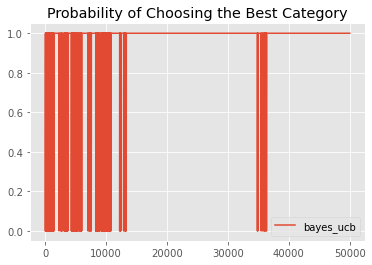

In [ ]:
# plot probability of choosing the best arm
fig = plt.figure()
ax = fig.add_subplot(111)
for ucb in bucb_results_plot['type'].unique():
    results_ucb = bucb_results_plot[bucb_results_plot['type']==ucb]
    ax.plot(results_ucb['n_step'], results_ucb['if_best_arm'], label=str(ucb))
plt.legend()
plt.title('Probability of Choosing the Best Category')
plt.savefig('Bayesian UCB/bucb_best_arm.png', dpi=300)
plt.show()

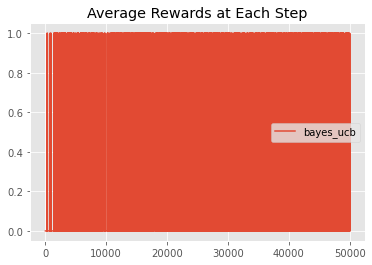

In [ ]:
# plot average rewards at each step
fig = plt.figure()
ax = fig.add_subplot(111)
for ucb in bucb_results_plot['type'].unique():
    results_ucb = bucb_results_plot[bucb_results_plot['type']==ucb]
    ax.plot(results_ucb['n_step'], results_ucb['rewards'], label=str(ucb))
plt.legend()
plt.title("Average Rewards at Each Step")
plt.savefig('Bayesian UCB/bucb_avg_rewards.png', dpi=300)
plt.show()

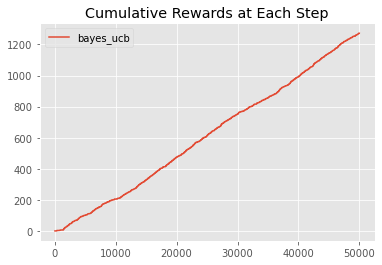

In [ ]:
# plot cumulative rewards at each step
fig = plt.figure()
ax = fig.add_subplot(111)
for ucb in bucb_results_plot['type'].unique():
    results_ucb = bucb_results_plot[bucb_results_plot['type']==ucb]
    ax.plot(results_ucb['n_step'], results_ucb['cumulative_rewards'], label=str(ucb))
plt.legend()
plt.title('Cumulative Rewards at Each Step')
plt.savefig('Bayesian UCB/bucb_cum_rewards.png', dpi=300)
plt.show()

## 3.7. Thompson Sampling

In [ ]:
thomp_results['if_best_arm'] = np.where(thomp_results['chosen_arm']==df.columns.get_loc(df.sum().idxmax()), 1, 0)
thomp_results_plot = thomp_results.groupby(['type', 'n_step'], as_index=False).aggregate({'if_best_arm': lambda x: x.sum()/float(x.count()), 'rewards':'mean', 'cumulative_rewards':'mean'})
plt.style.use('ggplot')

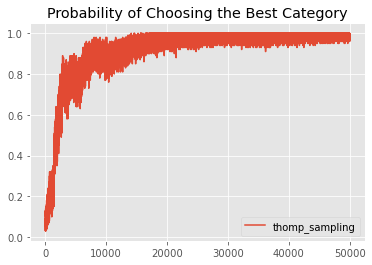

In [ ]:
# plot probability of choosing the best arm
fig = plt.figure()
ax = fig.add_subplot(111)
for thomp in thomp_results_plot['type'].unique():
    results_thomp = thomp_results_plot[thomp_results_plot['type']==thomp]
    ax.plot(results_thomp['n_step'], results_thomp['if_best_arm'], label=str(thomp))
plt.legend()
plt.title('Probability of Choosing the Best Category')
plt.savefig('Thompson Sampling/thomp_best_arm.png', dpi=300)
plt.show()

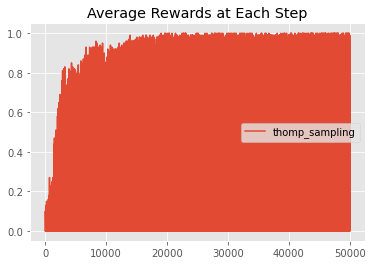

In [ ]:
# plot average rewards at each step
fig = plt.figure()
ax = fig.add_subplot(111)
for thomp in thomp_results_plot['type'].unique():
    results_thomp = thomp_results_plot[thomp_results_plot['type']==thomp]
    ax.plot(results_thomp['n_step'], results_thomp['rewards'], label=str(thomp))
plt.legend()
plt.title("Average Rewards at Each Step")
plt.savefig('Thompson Sampling/thomp_avg_rewards.png', dpi=300)
plt.show()

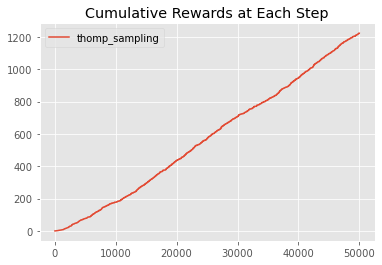

In [ ]:
# plot cumulative rewards at each step
fig = plt.figure()
ax = fig.add_subplot(111)
for thomp in thomp_results_plot['type'].unique():
    results_thomp = thomp_results_plot[thomp_results_plot['type']==thomp]
    ax.plot(results_thomp['n_step'], results_thomp['cumulative_rewards'], label=str(thomp))
plt.legend()
plt.title('Cumulative Rewards at Each Step')
plt.savefig('Thompson Sampling/thomp_cum_rewards.png', dpi=300)
plt.show()